In [51]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

In [2]:
df = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day14/FMAC-HPI_24420.csv")
df

,Date,NSA Value,SA Value
0,31-01-1975,24.739893,24.687815
1,28-02-1975,25.266825,25.200482
2,31-03-1975,25.765667,25.633002
3,30-04-1975,26.212724,26.009987
4,31-05-1975,26.628081,26.350592
...,...,...,...
526,30-11-2018,206.807173,207.368918
527,31-12-2018,206.300515,208.264073
528,31-01-2019,206.872042,209.156256
529,28-02-2019,208.166243,209.610400


Additive Seasonal HW

In [40]:
# Additive Seasonal HW with parameters
y_train = df['NSA Value'][:-12]
y_test = df['NSA Value'][-12:]
alpha, beta, gamma = 0.5, 0.02, 0.15
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')

#without smoothing parameters
fit1 = hw_add.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)

#with auto tuning
#fit1 = hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

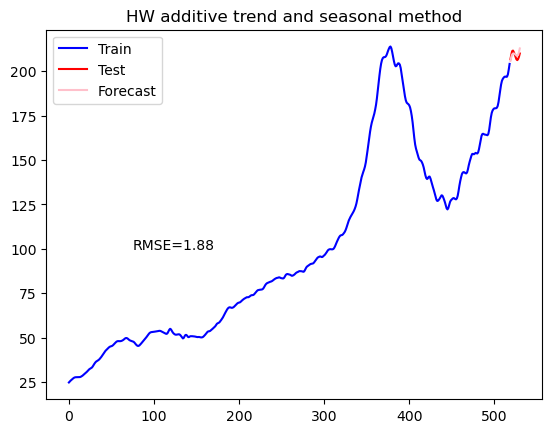

In [41]:
#plotting additve and seasonal method
y_train.plot(color='blue', label='Train')
y_test.plot(color='red', label='Test')
fcast1.plot(color='pink', label='Forecast')
error = round(np.sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(75, 100, "RMSE="+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc='best')
plt.show()

In [ ]:
#RMSE (with params) : 2.34  # alpha, beta, gamma = 0.8, 0.02, 0.1
#RMSE (with params) : 1.88  # alpha, beta, gamma = 0.5, 0.02, 0.15
#RMSE (without params) : 16.88  

Multiplicative Seasonal HW

In [47]:
# Multiplicative Seasonal HW with parameters
y_train = df['NSA Value'][:-12]
y_test = df['NSA Value'][-12:]
alpha, beta, gamma = 0.5, 0.02, 0.15
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul')

#without smoothing parameters
fit1 = hw_add.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)

#with auto tuning
#fit1 = hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

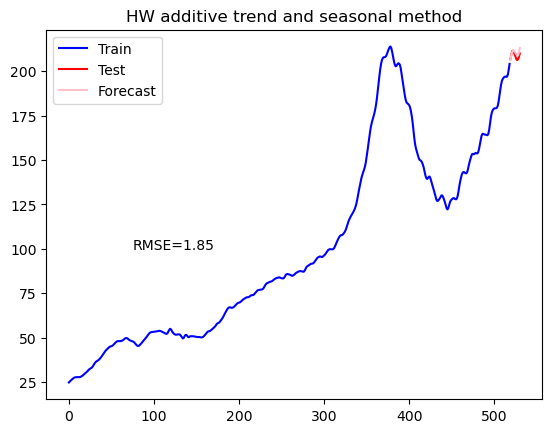

In [48]:
#plotting additve and seasonal method
y_train.plot(color='blue', label='Train')
y_test.plot(color='red', label='Test')
fcast1.plot(color='pink', label='Forecast')
error = round(np.sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(75, 100, "RMSE="+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc='best')
plt.show()

In [ ]:
#RMSE (with params) : 1.85  # alpha, beta, gamma = 0.8, 0.02, 0.1
#RMSE (without params) : 11.94  

Holt's Linear Trend

In [69]:
alpha= 0.5
beta = 0.4

#linear
ses = Holt(y_test)
fit1 = ses.fit(smoothing_level = alpha, smoothing_trend = beta)
fcast1 = fit1.forecast(len(y_test))

C:\ProgramData\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


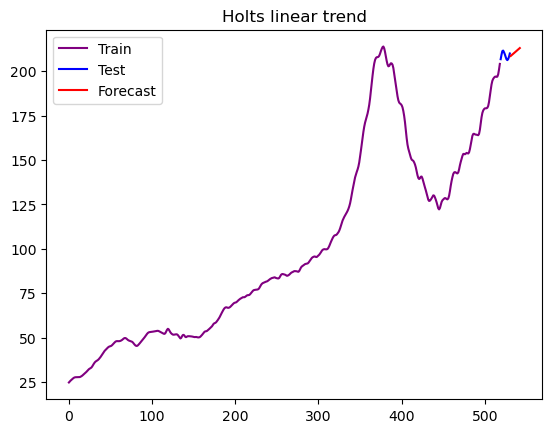

In [70]:
#plot
y_train.plot(color='purple', label='Train')
y_test.plot(color='blue', label='Test')
fcast1.plot(color='red', label='Forecast')
plt.title("Holts linear trend")
plt.legend(loc='best')
plt.show()

In [71]:
print("RMSE= ", np.sqrt(mean_squared_error(y_test, fcast1)))

RMSE=  3.324811910854311


In [ ]:
#RMSE=  9.570297768109004,  alpha= 0.15 , beta = 1
#RMSE=  3.324811910854311,  alpha= 0.5 , beta = 0.4

Holt's Exponential  Trend

In [94]:
ses = Holt(y_train, exponential= True)
#for not auto tune
alpha= 0.1
beta = 0.7
fit1 = ses.fit(smoothing_level = alpha, smoothing_trend = beta)

#for auto tune
#fit1 = ses.fit()
fcast1 = fit1.forecast(len(y_test))

C:\ProgramData\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


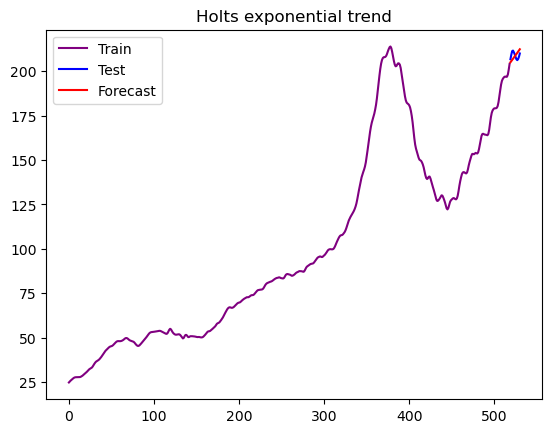

In [95]:
#plot
y_train.plot(color='purple', label='Train')
y_test.plot(color='blue', label='Test')
fcast1.plot(color='red', label='Forecast')
plt.title("Holts exponential trend")
plt.legend(loc='best')
plt.show()

In [96]:
print("RMSE= ", np.sqrt(mean_squared_error(y_test, fcast1)))

RMSE=  3.353158039758271


In [ ]:
#RMSE=  3.353158039758271,  alpha= 0.1 , beta = 0.7

simple exponential smoothing

In [103]:
alpha = 1


ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level = alpha)
fcast1 = fit1.forecast(len(y_test))

C:\ProgramData\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


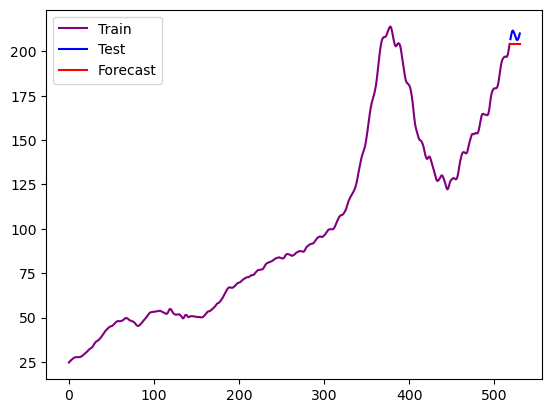

In [104]:
#plot
y_train.plot(color='purple', label='Train')
y_test.plot(color='blue', label='Test')
fcast1.plot(color='red', label='Forecast')
plt.legend(loc='best')
plt.show()

In [105]:
print("RMSE= ", np.sqrt(mean_squared_error(y_test, fcast1)))

RMSE=  4.995949576396307
